In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
miles_driven=pd.read_csv('DataSet/miles-driven.csv',sep="|")
miles_driven.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
road_accident=pd.read_csv('DataSet/road-accidents.csv',comment="#",sep="|")
road_accident.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [3]:
road_accident.shape
road_accident.info()

NameError: name 'road_accident' is not defined

In [30]:
summarize_form_of_rd=road_accident.describe()
summarize_form_of_rd

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.00000
mean,15.790196,31.725490,30.686275,88.72549
std,4.122002,9.633438,5.132213,6.96011
min,5.900000,13.000000,16.000000,76.00000
25%,12.750000,23.000000,28.000000,83.50000
50%,15.600000,34.000000,30.000000,88.00000
75%,18.500000,38.000000,33.000000,95.00000
max,23.900000,54.000000,44.000000,100.00000


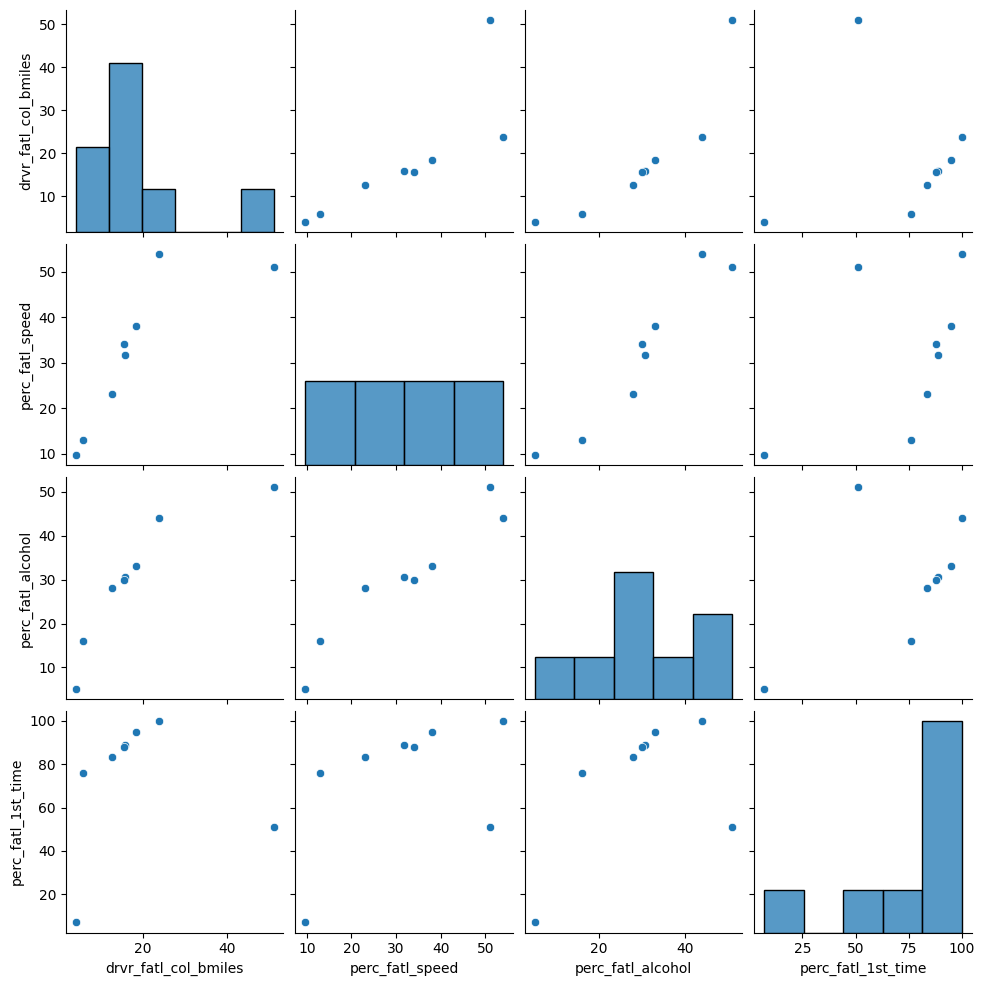

In [41]:
sn.pairplot(summarize_form_of_rd)
plt.show()

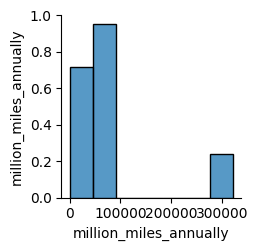

In [39]:
summarize_form_of_miles=miles_driven.describe()
summarize_form_of_miles
sn.pairplot(summarize_form_of_miles)
plt.show()

In [44]:
road_accident.isnull().sum()

state                   0
drvr_fatl_col_bmiles    0
perc_fatl_speed         0
perc_fatl_alcohol       0
perc_fatl_1st_time      0
dtype: int64

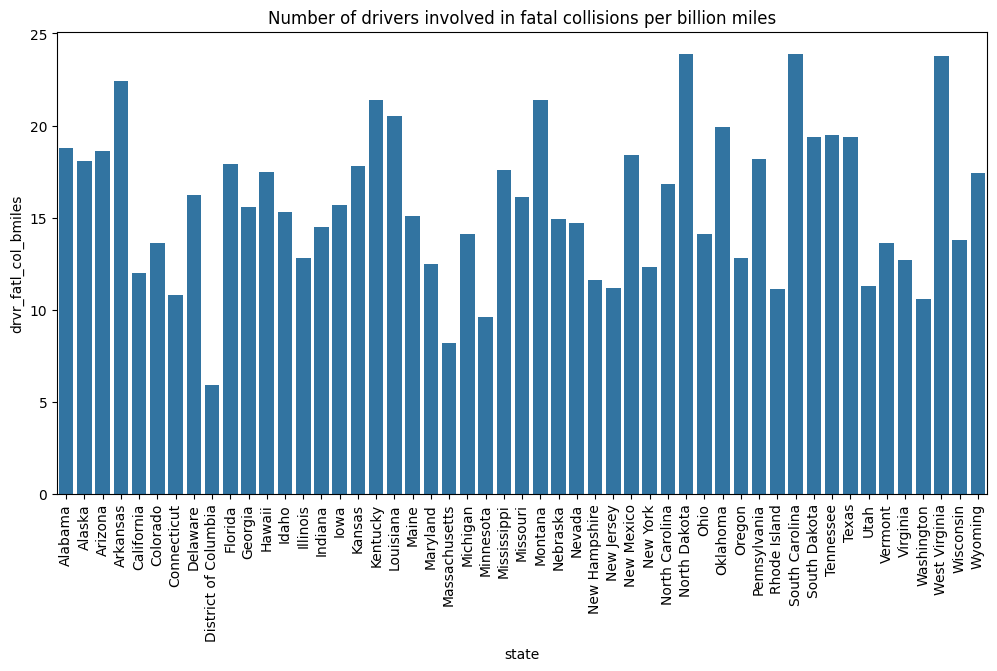

In [52]:
plt.figure(figsize=(12,6))
sn.barplot(x='state',y='drvr_fatl_col_bmiles',data=road_accident)
plt.xticks(rotation=90)
plt.title('Number of drivers involved in fatal collisions per billion miles')
plt.show()

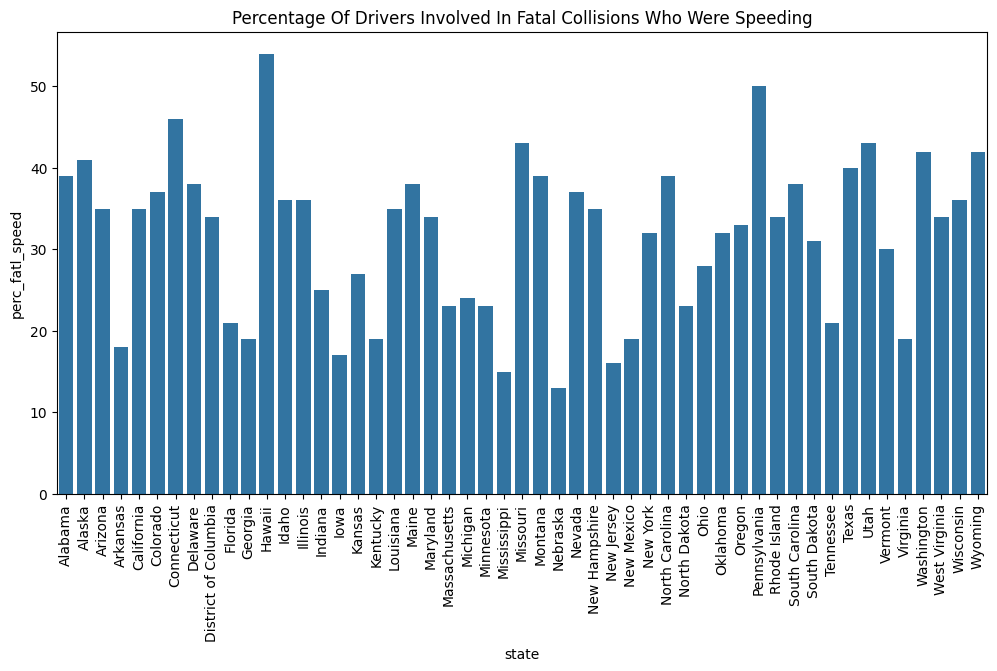

In [53]:
plt.figure(figsize=(12,6))
sn.barplot(x='state',y='perc_fatl_speed',data=road_accident)
plt.xticks(rotation=90)
plt.title('Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding')
plt.show()

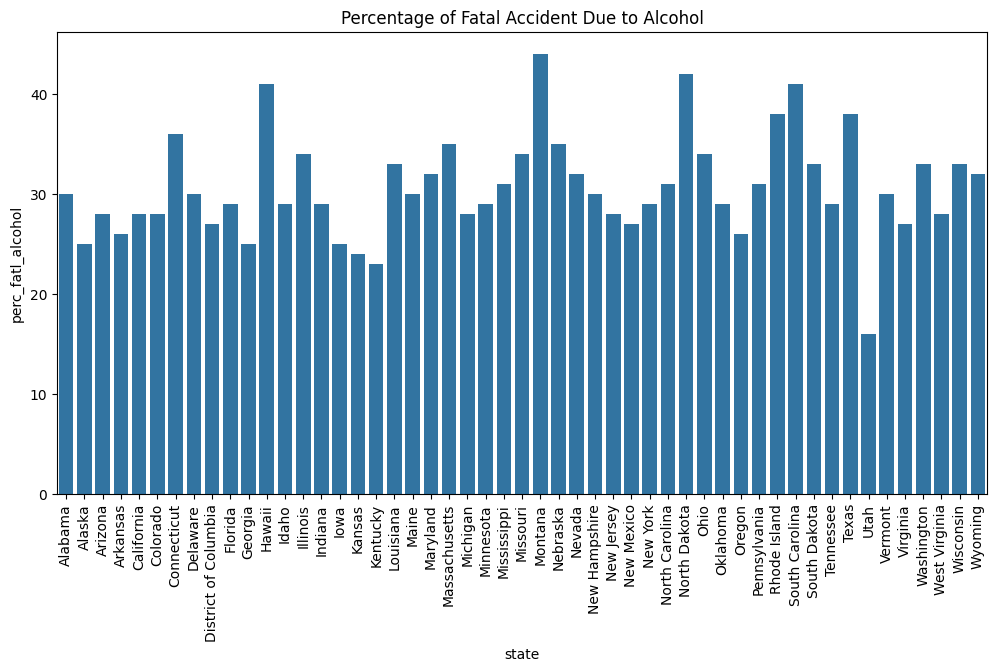

In [51]:
plt.figure(figsize=(12,6))
sn.barplot(x='state',y='perc_fatl_alcohol',data=road_accident)
plt.xticks(rotation=90)
plt.title('Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired')
plt.show()

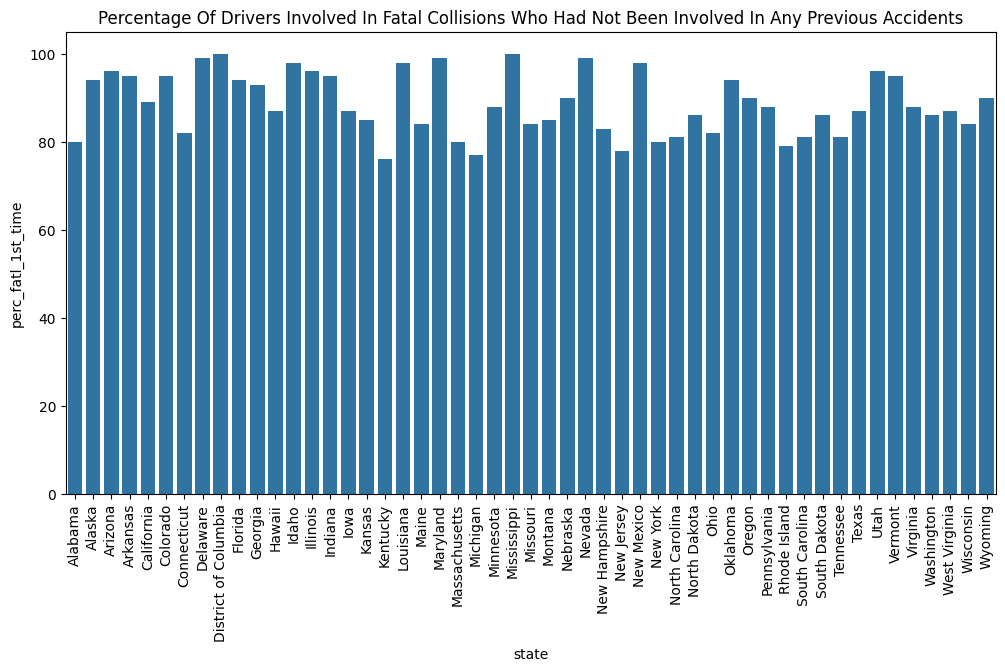

In [54]:
plt.figure(figsize=(12,6))
sn.barplot(x='state',y='perc_fatl_1st_time',data=road_accident)
plt.xticks(rotation=90)
plt.title('Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents')
plt.show()

In [56]:
state_summary = road_accident.groupby('state')[['drvr_fatl_col_bmiles', 'perc_fatl_speed']].mean().sort_values(by='drvr_fatl_col_bmiles', ascending=False)
print(state_summary)

                      drvr_fatl_col_bmiles  perc_fatl_speed
state                                                      
North Dakota                          23.9             23.0
South Carolina                        23.9             38.0
West Virginia                         23.8             34.0
Arkansas                              22.4             18.0
Montana                               21.4             39.0
Kentucky                              21.4             19.0
Louisiana                             20.5             35.0
Oklahoma                              19.9             32.0
Tennessee                             19.5             21.0
Texas                                 19.4             40.0
South Dakota                          19.4             31.0
Alabama                               18.8             39.0
Arizona                               18.6             35.0
New Mexico                            18.4             19.0
Pennsylvania                          18

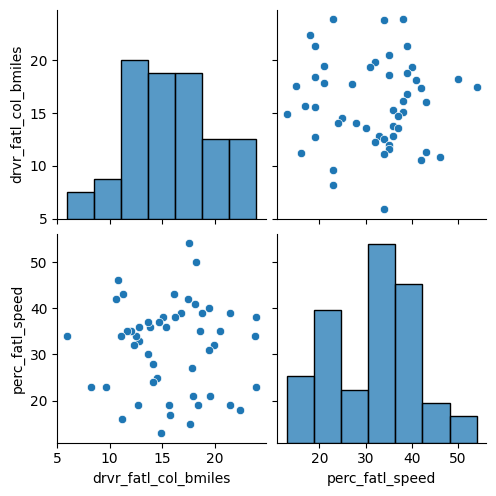

In [57]:
sn.pairplot(state_summary)
plt.show()

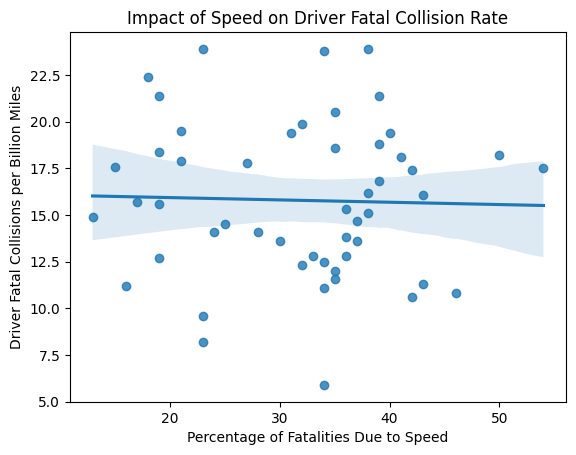

In [61]:
sn.regplot(x='perc_fatl_speed', y='drvr_fatl_col_bmiles', data=road_accident)
plt.title("Impact of Speed on Driver Fatal Collision Rate")
plt.xlabel("Percentage of Fatalities Due to Speed")
plt.ylabel("Driver Fatal Collisions per Billion Miles")
plt.show()

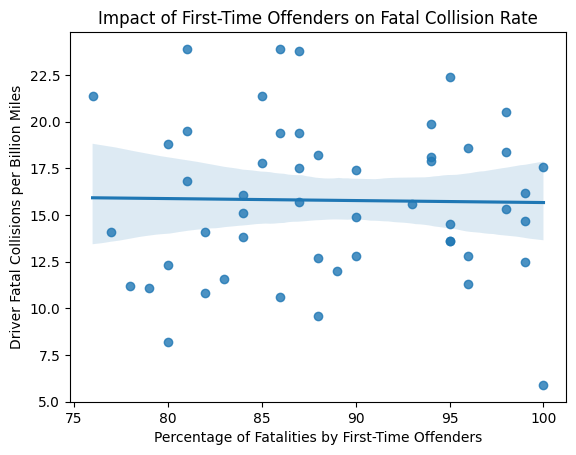

In [62]:
sn.regplot(x='perc_fatl_1st_time', y='drvr_fatl_col_bmiles', data=road_accident)
plt.title("Impact of First-Time Offenders on Fatal Collision Rate")
plt.xlabel("Percentage of Fatalities by First-Time Offenders")
plt.ylabel("Driver Fatal Collisions per Billion Miles")
plt.show()

In [ ]:
high_risk_states = road_accident[(road_accident['perc_fatl_speed'] > road_accident['perc_fatl_speed'].median()) & 
                                 (road_accident['perc_fatl_alcohol'] > road_accident['perc_fatl_alcohol'].median())]
print(high_risk_states[['state', 'perc_fatl_speed', 'perc_fatl_alcohol', 'drvr_fatl_col_bmiles']])


             state  perc_fatl_speed  perc_fatl_alcohol  drvr_fatl_col_bmiles
6      Connecticut               46                 36                  10.8
11          Hawaii               54                 41                  17.5
13        Illinois               36                 34                  12.8
18       Louisiana               35                 33                  20.5
25        Missouri               43                 34                  16.1
26         Montana               39                 44                  21.4
28          Nevada               37                 32                  14.7
33  North Carolina               39                 31                  16.8
38    Pennsylvania               50                 31                  18.2
40  South Carolina               38                 41                  23.9
43           Texas               40                 38                  19.4
47      Washington               42                 33                  10.6